### 11.6 pyecharts简介
pyecharts是由Python echarts合并而成，用于生成 Echarts图表的类库。 Echarts是百度开源的一个数据可视化js库。主要用于数据可视化，更详细的介绍请参考[官网](https://pyecharts.org)

#### 11.6.1  pyecharts安装
Pyecharts 兼容Python 2 和 Python 3。安装Pyecharts 的方法如下。  
（1） 登录[Pyecharts官网](https://pypi.org/project/pyecharts/0.5.11/#files)， 下载pyecharts-
0.5.11-py2.py3-none-any.whl。  
（2）运行以下代码安装Pyecharts。  
pip install pyecharts-0.5.11-py2.py3-none-any.whl

#### 11.6.2 降水量和蒸发量柱状图
绘制某地的降水量和蒸发量柱状图，代码如下

In [2]:
from pyecharts import Bar
attr = ["{}月".format(i) for i in range(1, 13)]
v1 = [2.0, 4.9, 7.0, 23.2, 25.6, 76.7, 135.6, 162.2, 32.6, 20.0, 6.4,3.3]
v2 = [2.6, 5.9, 9.0, 26.4, 28.7, 70.7, 175.6, 182.2, 48.7, 18.8, 6.0,2.3]
bar = Bar("柱状图示例")
bar.add("蒸发量", attr, v1, mark_line=["average"], mark_point=["max","min"])
bar.add("降水量", attr, v2, mark_line=["average"], mark_point=["max","min"])
bar.render("bar01.html")

进入当前目录，用Google Chrome（或IE）打开文件bar01.html,可看到如下图形：
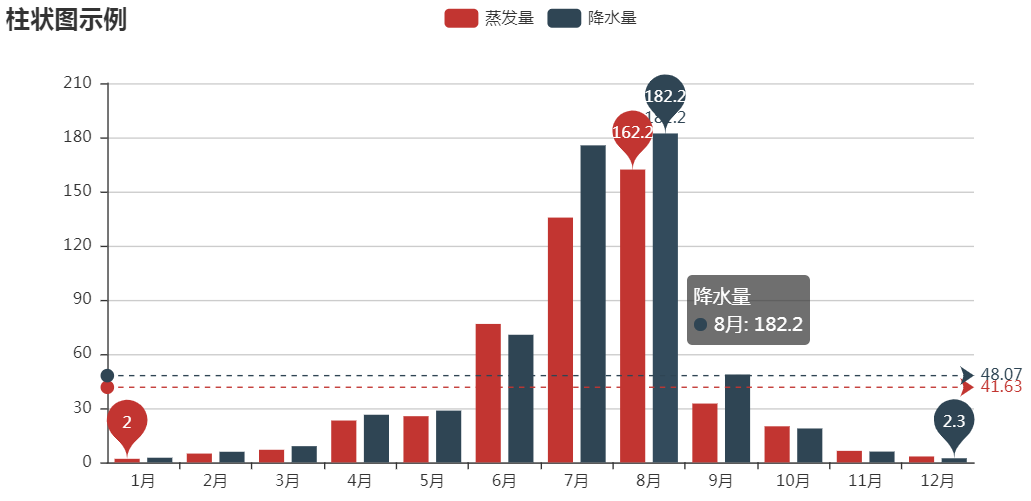

#### 11.6.3 从上海出发的航线图
用Pyecharts 中的GeoLines、Style 模块，可以很方便地对带有起点和终点信息的线数据进行绘
图，主要用于地图上的航线、路线的可视化。这里使用这些模块绘制从上海到北京、广州、南京等
城市的飞行路线图，具体代码如下。

In [3]:
from pyecharts import GeoLines, Style
style = Style(
title_top="#fff",
title_pos = "center",
width=1200,
height=600,
background_color="#31CAF6"
)

data_shanghai = [
    ["上海", "广州"],
    ["上海", "北京"],
    ["上海", "南京"],
    ["上海", "重庆"],
    ["上海", "兰州"],
    ["上海", "南昌"],
    ["上海", "武汉"],
    ["上海", "福建"],
    ["上海", "杭州"]
]


style_geo = style.add(
    is_label_show=True,
    line_curve=0.2,
    line_opacity=0.6,
    legend_text_color="#eee",
    legend_pos="right",
    geo_effect_symbol="plane",
    geo_effect_symbolsize=15,
    label_color=['#a6c84c', '#ffa022', '#46bee9'],
    label_pos="right",
    label_formatter="{b}",
    label_text_color="#eee",
)
geolines = GeoLines("GeoLines 示例", **style.init_style)
geolines.add("从上海出发", data_shanghai, **style_geo)
geolines.render("shanghai-out.html")

用Google Chrome（或IE）打开当前目录下生成的文件shanghai-out.html，可看到动画图形：
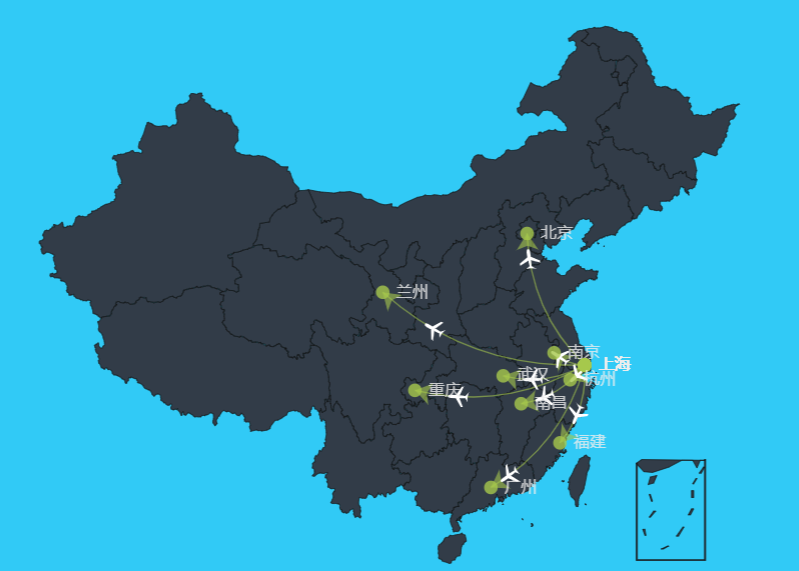

### 11.7 实例：词云图
#### 11.7.1 实例概况
实例环境：Windows 或Linux，Python 3.6+，[jieba](https://pypi.org/project/jieba/)（ 中文分词），PIL（ 图像处理），[WordCloud](https://amueller.github.io/word_cloud/)（词云表现）、Matplotlib（图像显示）等。其中jieba、wordcloud 需要用pip 安装。
具体安装方法如下。

#### 11.7.2 代码实现
文本信息：使用环球时报上一篇文章，题为《“中国芯”亟待顶层设计》

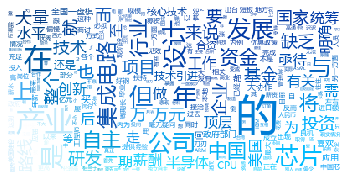

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt #绘图库
import jieba #分词库
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator #词云库
%matplotlib inline

#1.读入txt文本数据
text = open(r'../data/chinese-core.txt',"rb").read()
#2.结巴分词，默认精确模式。可以添加自定义词典userdict.txt,然后调用jieba.load_userdict(
#file_name) ,file_name为文件类对象或自定义词典的路径
# 自定义词典格式和默认词库dict.txt一样，一个词占一行，每一行分三部分—词语、词频
#（可省略）、词性（可省略），用空格隔开，顺序不可颠倒
cut_text= jieba.cut(text)
result= "/".join(cut_text)#必须给符号分隔开分词结果来形成字符串,否则不能绘制词云
#print(result)
#3.初始化自定义背景图片
image = Image.open(r'../data/back.jpg')
graph = np.array(image)
#4.生成词云图，注意WordCloud默认不支持中文，所以需要提前下载好中文字库
#5.绘制文字的颜色，以背景图颜色为参考
image_color = ImageColorGenerator(graph)#从背景图片生成颜色值
#无自定义背景图：需要指定生成词云图的像素大小，默认背景颜色为黑色,统一文字颜色：
#mode='RGBA'和colormap='pink'
wc = WordCloud(font_path=r"../data/msyh.ttc",max_font_size=50,background_color='white',
max_words=1000,color_func=image_color,mode='RGBA',colormap='pink')#background_color='white'
wc.generate(result)
#wc.recolor(color_func=image_color)
wc.to_file(r"../data/wordcloud.png") #按照设置的像素宽、高度保存绘制好的词云图
# 6.显示图片
plt.figure("词云图") #指定所绘图名称
plt.imshow(wc) #以图片的形式显示词云
plt.axis("off") #关闭图像坐标系
plt.show()
